In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import Dict, List
import pandas as pd

def load_metrics(filepath: str) -> Dict:
    """Load metrics from JSON file."""
    with open(filepath, 'r') as f:
        return json.load(f)

def compute_macro_metrics(per_class_metrics):
    """Compute macro-averaged precision and recall."""
    precisions = []
    recalls = []
    
    for class_metrics in per_class_metrics.values():
        precisions.append(class_metrics['precision'])
        recalls.append(class_metrics['recall'])
    
    macro_precision = np.mean(precisions)
    macro_recall = np.mean(recalls)
    
    return macro_precision, macro_recall

def plot_training_curves(family_metrics: List[Dict], group_metrics: List[Dict]):
    """Plot precision and recall curves over time."""
    epochs = range(len(family_metrics))
    
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot family classification metrics
    val_precisions = []
    val_recalls = []
    for metrics in family_metrics:
        precision, recall = compute_macro_metrics(metrics['val']['per_class'])
        val_precisions.append(precision)
        val_recalls.append(recall)
    
    ax1.plot(val_precisions, label='Macro Precision')
    ax1.plot(val_recalls, label='Macro Recall')
    ax1.set_title('Family Classification Performance')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Score')
    ax1.legend()
    ax1.grid(True)
    
    # Plot group classification metrics
    if group_metrics:
        val_precisions_g = []
        val_recalls_g = []
        for metrics in group_metrics:
            precision, recall = compute_macro_metrics(metrics['val']['per_class'])
            val_precisions_g.append(precision)
            val_recalls_g.append(recall)
        
        ax2.plot(val_precisions_g, label='Macro Precision')
        ax2.plot(val_recalls_g, label='Macro Recall')
    
    ax2.set_title('Group Classification Performance')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Score')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig('precision_recall_curves.png')
    plt.close()

def plot_per_class_metrics(metrics: Dict, title: str, output_file: str):
    """Plot per-class precision and recall."""
    per_class = metrics['val']['per_class']
    classes = sorted(list(per_class.keys()))
    
    # Extract metrics
    precisions = [per_class[c]['precision'] for c in classes]
    recalls = [per_class[c]['recall'] for c in classes]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(classes))
    width = 0.35
    
    # Create bars
    ax.bar(x - width/2, precisions, width, label='Precision')
    ax.bar(x + width/2, recalls, width, label='Recall')
    
    # Customize plot
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

def plot_precision_recall_heatmap(metrics: Dict, title: str, output_file: str):
    """Create heatmap of precision and recall per class."""
    per_class = metrics['val']['per_class']
    classes = sorted(list(per_class.keys()))
    
    # Create DataFrame for heatmap
    data = []
    for class_id in classes:
        metrics = per_class[class_id]
        data.append([
            metrics['precision'],
            metrics['recall']
        ])
    
    df = pd.DataFrame(data, index=classes, columns=['Precision', 'Recall'])
    
    # Plot heatmap
    plt.figure(figsize=(10, len(classes)*0.4 + 2))
    sns.heatmap(df, annot=True, fmt='.3f', cmap='YlOrRd', center=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

def main():
    try:
        # Load metrics
        family_metrics = load_metrics('/data/saranyav/gcn_new/family_metrics.json')
        group_metrics = load_metrics('/data/saranyav/gcn_new/group_metrics.json')
        
        # Plot training curves
        plot_training_curves(family_metrics, group_metrics)
        
        # Get final epoch metrics
        final_family = family_metrics[-1]
        final_group = group_metrics[-1]
        
        # Plot per-class metrics for the last epoch
        plot_per_class_metrics(final_family, 
                             'Family Classification - Per-Class Precision and Recall',
                             'family_per_class_pr.png')
        
        plot_per_class_metrics(final_group,
                             'Group Classification - Per-Class Precision and Recall',
                             'group_per_class_pr.png')
        
        # Plot precision-recall heatmaps
        plot_precision_recall_heatmap(final_family,
                                    'Family Classification - Precision-Recall Heatmap',
                                    'family_pr_heatmap.png')
        
        plot_precision_recall_heatmap(final_group,
                                    'Group Classification - Precision-Recall Heatmap',
                                    'group_pr_heatmap.png')
        
        # Print final metrics
        print("\nFinal Metrics:")
        
        # Family classification
        print("\nFamily Classification:")
        macro_p, macro_r = compute_macro_metrics(final_family['val']['per_class'])
        print(f"Macro Precision: {macro_p:.4f}")
        print(f"Macro Recall: {macro_r:.4f}")
        
        # print("\nPer-Class Performance:")
        # for class_id, metrics in final_family['val']['per_class'].items():
        #     print(f"\nClass {class_id}:")
        #     print(f"Precision: {metrics['precision']:.4f}")
        #     print(f"Recall: {metrics['recall']:.4f}")
        #     print(f"Support: {metrics['support']}")
        
        # Group classification
        print("\nGroup Classification:")
        macro_p, macro_r = compute_macro_metrics(final_group['val']['per_class'])
        print(f"Macro Precision: {macro_p:.4f}")
        print(f"Macro Recall: {macro_r:.4f}")
        
        print("\nPer-Class Performance:")
        for class_id, metrics in final_group['val']['per_class'].items():
            print(f"\nClass {class_id}:")
            print(f"Precision: {metrics['precision']:.4f}")
            print(f"Recall: {metrics['recall']:.4f}")
            print(f"Support: {metrics['support']}")
        
    except Exception as e:
        print(f"Error in main: {str(e)}")
        raise e

if __name__ == "__main__":
    main()


Final Metrics:

Family Classification:
Macro Precision: 0.1656
Macro Recall: 0.1873

Group Classification:
Macro Precision: 0.3267
Macro Recall: 0.5435

Per-Class Performance:

Class 0:
Precision: 0.8431
Recall: 0.3048
Support: 1834

Class 1:
Precision: 0.0992
Recall: 0.7475
Support: 198

Class 3:
Precision: 0.0288
Recall: 0.6000
Support: 35

Class 4:
Precision: 0.0810
Recall: 0.0678
Support: 546

Class 5:
Precision: 0.5300
Recall: 0.7794
Support: 68

Class 6:
Precision: 0.9375
Recall: 0.5650
Support: 3186

Class 10:
Precision: 0.0191
Recall: 1.0000
Support: 4

Class 15:
Precision: 0.5681
Recall: 0.9942
Support: 172

Class 17:
Precision: 0.1250
Recall: 0.1667
Support: 6

Class 18:
Precision: 0.1667
Recall: 1.0000
Support: 7

Class 19:
Precision: 0.0000
Recall: 0.0000
Support: 1

Class 20:
Precision: 1.0000
Recall: 0.9130
Support: 23

Class 23:
Precision: 0.3333
Recall: 1.0000
Support: 2

Class 24:
Precision: 0.9941
Recall: 0.8896
Support: 1322

Class 25:
Precision: 0.0896
Recall: 0.46

In [2]:
import json
import numpy as np

def load_metrics(filepath):
    """Load metrics from JSON file."""
    with open(filepath) as f:
        return json.load(f)

def calculate_classification_metrics(metrics):
    """Calculate weighted classification performance from overall metrics."""
    overall = metrics['overall']
    return {
        'precision': overall['precision'],
        'recall': overall['recall'],
        'f1': overall['f1']
    }

def calculate_novelty_metrics(raw_counts):
    """Calculate metrics for both novel and known detection."""
    # Novel class metrics
    novel_precision = raw_counts['tp'] / (raw_counts['tp'] + raw_counts['fp']) if (raw_counts['tp'] + raw_counts['fp']) > 0 else 0
    novel_recall = raw_counts['tp'] / (raw_counts['tp'] + raw_counts['fn']) if (raw_counts['tp'] + raw_counts['fn']) > 0 else 0
    novel_f1 = 2 * (novel_precision * novel_recall) / (novel_precision + novel_recall) if (novel_precision + novel_recall) > 0 else 0

    # Known class metrics
    known_precision = raw_counts['tn'] / (raw_counts['tn'] + raw_counts['fn']) if (raw_counts['tn'] + raw_counts['fn']) > 0 else 0
    known_recall = raw_counts['tn'] / (raw_counts['tn'] + raw_counts['fp']) if (raw_counts['tn'] + raw_counts['fp']) > 0 else 0
    known_f1 = 2 * (known_precision * known_recall) / (known_precision + known_recall) if (known_precision + known_recall) > 0 else 0
    
    total = sum(raw_counts.values())
    novel_samples = raw_counts['tp'] + raw_counts['fn']
    known_samples = raw_counts['tn'] + raw_counts['fp']
    
    return {
        'novel': {
            'precision': novel_precision,
            'recall': novel_recall,
            'f1': novel_f1
        },
        'known': {
            'precision': known_precision,
            'recall': known_recall,
            'f1': known_f1
        },
        'support': {
            'total': total,
            'novel': novel_samples,
            'known': known_samples
        }
    }

def analyze_metrics(metrics_path, model_type):
    """Analyze metrics for a specific model type (family or group)."""
    metrics_history = load_metrics(metrics_path)
    final_metrics = metrics_history[-1]  # Get last epoch
    
    print(f"\n{'='*20} {model_type.upper()} MODEL {'='*20}")
    
    # 1. Classification Performance
    print("\n1. Classification Performance (Known Classes)")
    print("-" * 50)
    
    for split in ['train', 'val']:
        print(f"\n{split.upper()} Split:")
        print(f"Loss: {final_metrics[split]['loss']:.4f}")
        if 'overall' in final_metrics[split]:
            metrics = calculate_classification_metrics(final_metrics[split])
            print(f"Precision: {metrics['precision']:.4f}")
            print(f"Recall: {metrics['recall']:.4f}")
            print(f"F1: {metrics['f1']:.4f}")
    
    # 2. Novelty Detection Performance - Both Methods
    print("\n2. Novelty Detection Performance")
    print("-" * 50)
    
    # Method 1: Centroid-based (from novel_detection)
    print("\nCENTROID-BASED DETECTION:")
    centroid_metrics = calculate_novelty_metrics(
        final_metrics['novel_detection']['overall']['raw_counts']
    )
    
    print("\nNovel Class Detection:")
    print(f"Precision: {centroid_metrics['novel']['precision']:.4f}")
    print(f"Recall: {centroid_metrics['novel']['recall']:.4f}")
    print(f"F1: {centroid_metrics['novel']['f1']:.4f}")
    
    print("\nKnown Class Detection:")
    print(f"Precision: {centroid_metrics['known']['precision']:.4f}")
    print(f"Recall: {centroid_metrics['known']['recall']:.4f}")
    print(f"F1: {centroid_metrics['known']['f1']:.4f}")
    
    total = centroid_metrics['support']['total']
    novel = centroid_metrics['support']['novel']
    known = centroid_metrics['support']['known']
    print("\nSupport:")
    print(f"Total samples: {total}")
    print(f"Novel samples: {novel} ({novel/total*100:.2f}%)")
    print(f"Known samples: {known} ({known/total*100:.2f}%)")
    
    # Method 2: Confidence-based (from val.novelty)
    if 'novelty' in final_metrics['val']:
        print("\nCONFIDENCE-BASED DETECTION:")
        confidence_metrics = final_metrics['val']['novelty']
        print("\nNovel Class Detection:")
        print(f"Precision: {confidence_metrics.get('precision', 0):.4f}")
        print(f"Recall: {confidence_metrics.get('recall', 0):.4f}")
        print(f"F1: {confidence_metrics.get('f1', 0):.4f}")

def main():
    # Analyze both family and group models
    analyze_metrics('/data/saranyav/gcn_new/family_metrics.json', 'family')
    analyze_metrics('/data/saranyav/gcn_new/group_metrics.json', 'group')

if __name__ == "__main__":
    main()


==================== FAMILY MODEL ====================

1. Classification Performance (Known Classes)
--------------------------------------------------

TRAIN Split:
Loss: 3.0909

VAL Split:
Loss: 0.4939
Precision: 0.6194
Recall: 0.5890
F1: 0.5873

2. Novelty Detection Performance
--------------------------------------------------

CENTROID-BASED DETECTION:

Novel Class Detection:
Precision: 0.0094
Recall: 1.0000
F1: 0.0186

Known Class Detection:
Precision: 1.0000
Recall: 0.0684
F1: 0.1280

Support:
Total samples: 7542
Novel samples: 66 (0.88%)
Known samples: 7476 (99.12%)

CONFIDENCE-BASED DETECTION:

Novel Class Detection:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000

==================== GROUP MODEL ====================

1. Classification Performance (Known Classes)
--------------------------------------------------

TRAIN Split:
Loss: 0.8248

VAL Split:
Loss: 1.1911
Precision: 0.8135
Recall: 0.5385
F1: 0.6144

2. Novelty Detection Performance
-------------------------------------

/tmp/ipykernel_1498123/1879747644.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


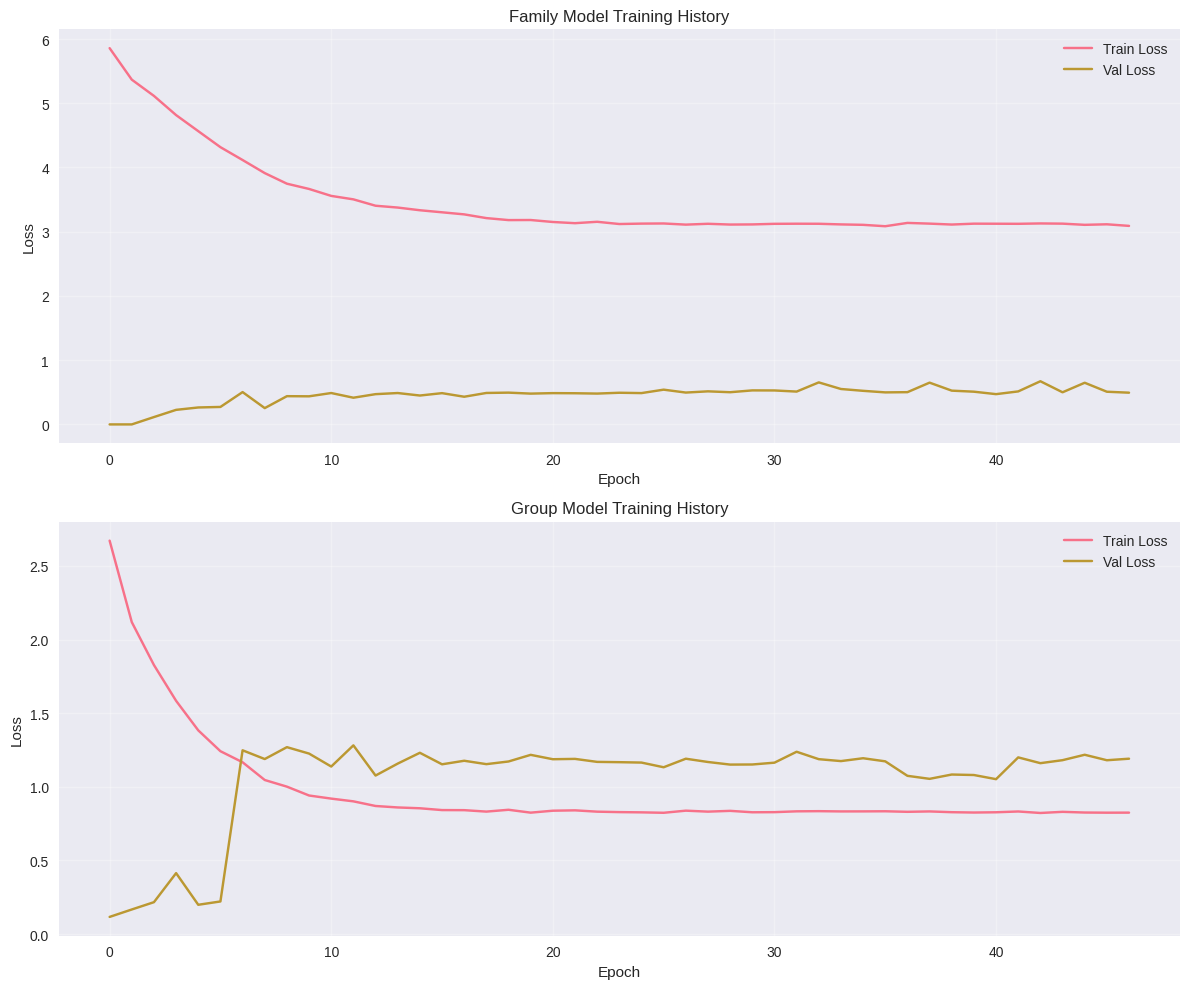

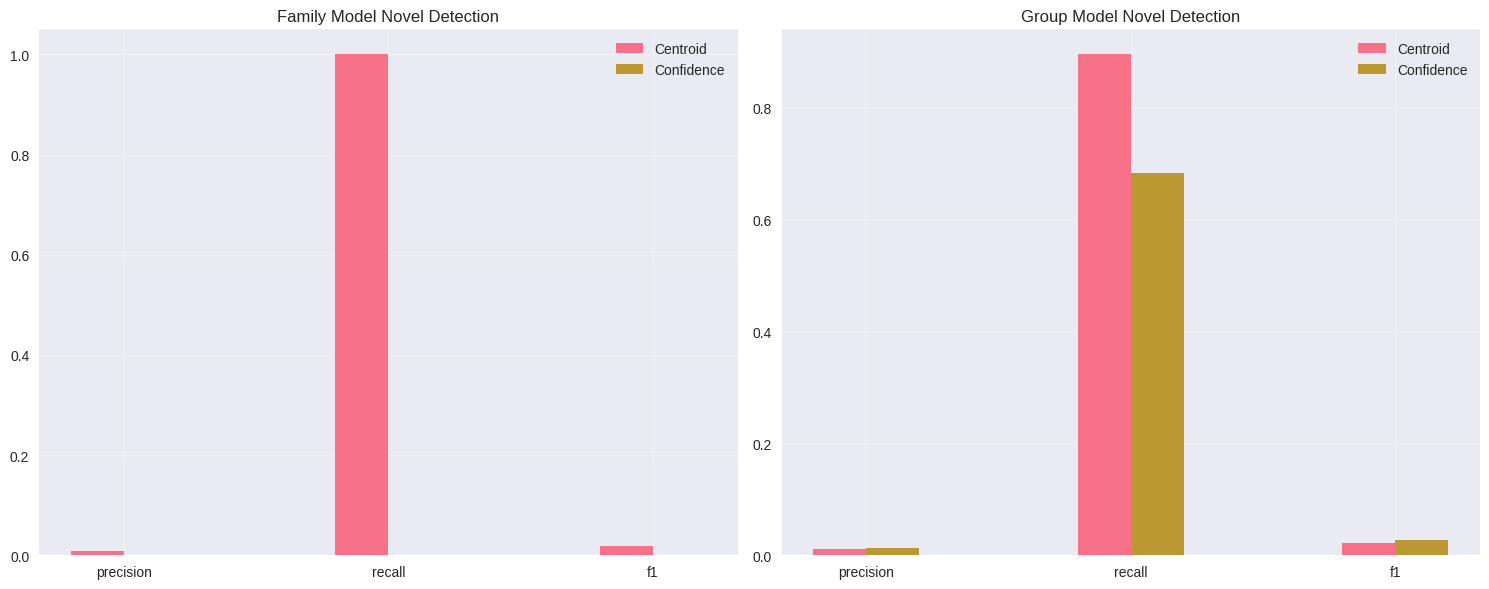

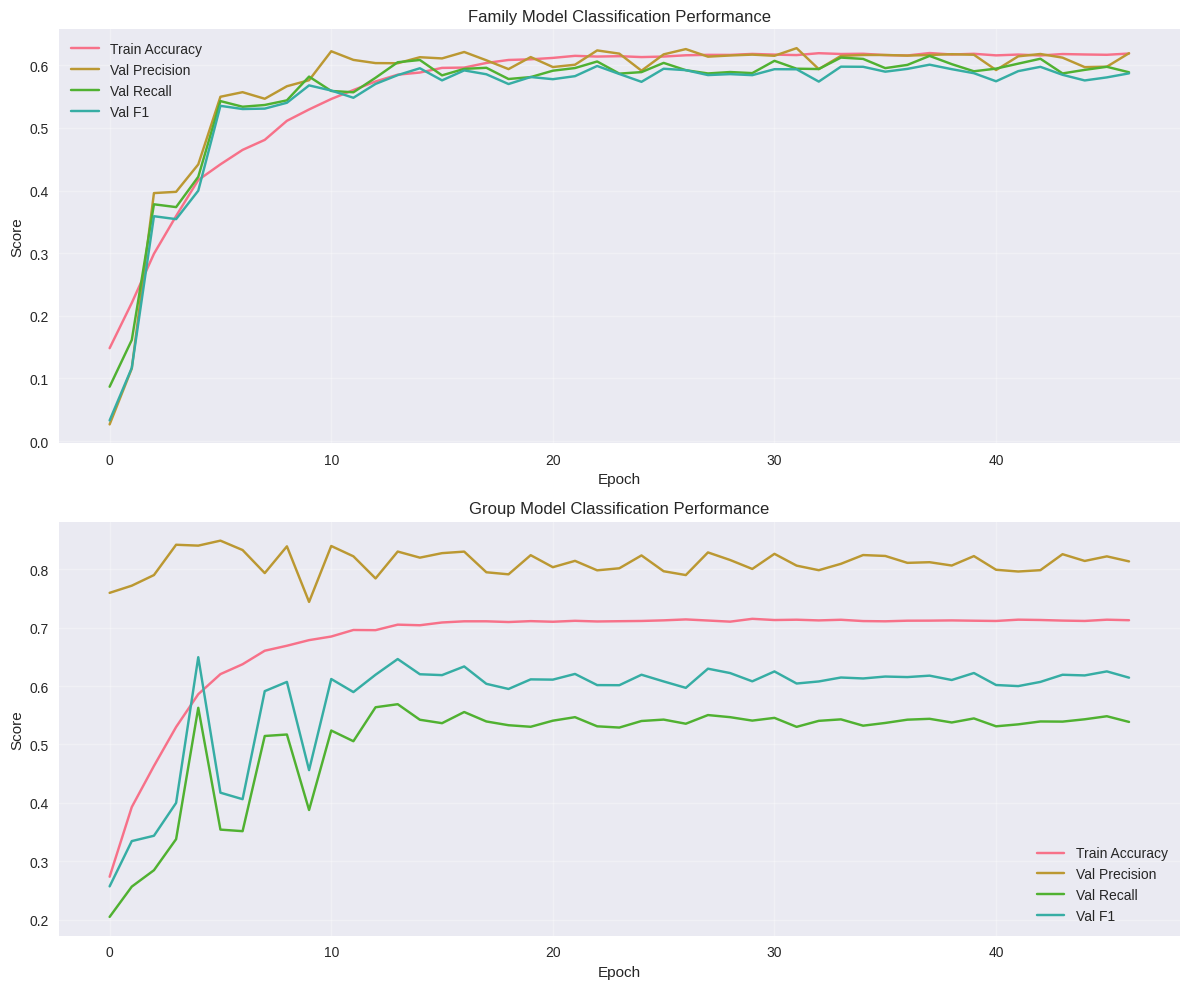

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for publication-quality plots
plt.style.use('seaborn')
sns.set_palette("husl")

def load_metrics(filepath):
    """Load metrics from JSON file."""
    with open(filepath) as f:
        return json.load(f)

def plot_training_history(family_metrics, group_metrics):
    """Plot training and validation loss over time."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    epochs = range(len(family_metrics))
    
    # Family model
    fam_train_loss = [m['train']['loss'] for m in family_metrics]
    fam_val_loss = [m['val']['loss'] for m in family_metrics]
    ax1.plot(epochs, fam_train_loss, label='Train Loss')
    ax1.plot(epochs, fam_val_loss, label='Val Loss')
    ax1.set_title('Family Model Training History')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Group model
    grp_train_loss = [m['train']['loss'] for m in group_metrics]
    grp_val_loss = [m['val']['loss'] for m in group_metrics]
    ax2.plot(epochs, grp_train_loss, label='Train Loss')
    ax2.plot(epochs, grp_val_loss, label='Val Loss')
    ax2.set_title('Group Model Training History')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_novelty_detection_comparison(family_metrics, group_metrics):
    """Compare novelty detection methods with bar plots."""
    # Extract final metrics
    fam_final = family_metrics[-1]
    grp_final = group_metrics[-1]
    
    # Get metrics for both methods
    metrics_data = []
    
    # Family model
    fam_centroid = fam_final['novel_detection']['overall']
    fam_confidence = fam_final['val']['novelty']
    
    # Group model
    grp_centroid = grp_final['novel_detection']['overall']
    grp_confidence = grp_final['val']['novelty']
    
    # Prepare data for plotting
    metrics = ['precision', 'recall', 'f1']
    methods = ['Centroid', 'Confidence']
    models = ['Family', 'Group']
    
    # Create comparison plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Novel class detection performance
    x = np.arange(len(metrics))
    width = 0.2
    
    # Plot for Family Model
    ax = axes[0]
    centroid_vals = [fam_centroid['precision'], fam_centroid['recall'], fam_centroid['f1']]
    confidence_vals = [fam_confidence['precision'], fam_confidence['recall'], fam_confidence['f1']]
    
    ax.bar(x - width/2, centroid_vals, width, label='Centroid')
    ax.bar(x + width/2, confidence_vals, width, label='Confidence')
    ax.set_title('Family Model Novel Detection')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot for Group Model
    ax = axes[1]
    centroid_vals = [grp_centroid['precision'], grp_centroid['recall'], grp_centroid['f1']]
    confidence_vals = [grp_confidence['precision'], grp_confidence['recall'], grp_confidence['f1']]
    
    ax.bar(x - width/2, centroid_vals, width, label='Centroid')
    ax.bar(x + width/2, confidence_vals, width, label='Confidence')
    ax.set_title('Group Model Novel Detection')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_classification_performance(family_metrics, group_metrics):
    """Plot classification performance over time."""
    epochs = range(len(family_metrics))
    print(epochs)
    # Extract metrics
    fam_train_acc = [m['train']['accuracy'] for m in family_metrics]
    fam_val_metrics = [m['val']['overall'] for m in family_metrics]
    grp_train_acc = [m['train']['accuracy'] for m in group_metrics]
    grp_val_metrics = [m['val']['overall'] for m in group_metrics]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Family model
    ax1.plot(epochs, fam_train_acc, label='Train Accuracy')
    ax1.plot(epochs, [m['precision'] for m in fam_val_metrics], label='Val Precision')
    ax1.plot(epochs, [m['recall'] for m in fam_val_metrics], label='Val Recall')
    ax1.plot(epochs, [m['f1'] for m in fam_val_metrics], label='Val F1')
    ax1.set_title('Family Model Classification Performance')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Score')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Group model
    ax2.plot(epochs, grp_train_acc, label='Train Accuracy')
    ax2.plot(epochs, [m['precision'] for m in grp_val_metrics], label='Val Precision')
    ax2.plot(epochs, [m['recall'] for m in grp_val_metrics], label='Val Recall')
    ax2.plot(epochs, [m['f1'] for m in grp_val_metrics], label='Val F1')
    ax2.set_title('Group Model Classification Performance')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Score')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Load metrics
family_metrics = load_metrics('/data/saranyav/gcn_new/family_metrics.json')
group_metrics = load_metrics('/data/saranyav/gcn_new/group_metrics.json')

# Create all visualizations
plot_training_history(family_metrics, group_metrics)
plot_novelty_detection_comparison(family_metrics, group_metrics)
plot_classification_performance(family_metrics, group_metrics)

In [4]:
import json
import numpy as np
from sklearn.metrics import roc_curve, auc
from collections import defaultdict

def load_metrics(filepath):
    """Load metrics from JSON file."""
    with open(filepath) as f:
        return json.load(f)
        
def calculate_weighted_macro_averages(metrics):
    """Calculate both weighted and macro averages."""
    per_class = metrics['val']['per_class']
    total_support = 0
    weighted_sums = {'precision': 0, 'recall': 0}
    macro_sums = {'precision': 0, 'recall': 0}
    num_classes = 0
    
    for class_metrics in per_class.values():
        support = class_metrics['support']
        total_support += support
        
        for metric in ['precision', 'recall']:
            weighted_sums[metric] += class_metrics[metric] * support
            macro_sums[metric] += class_metrics[metric]
        num_classes += 1
    
    # Calculate weighted averages
    weighted = {
        metric: weighted_sums[metric] / total_support if total_support > 0 else 0 
        for metric in ['precision', 'recall']
    }
    weighted['f1'] = 2 * (weighted['precision'] * weighted['recall']) / (weighted['precision'] + weighted['recall']) if (weighted['precision'] + weighted['recall']) > 0 else 0
    
    # Calculate macro averages
    macro = {
        metric: macro_sums[metric] / num_classes if num_classes > 0 else 0 
        for metric in ['precision', 'recall']
    }
    macro['f1'] = 2 * (macro['precision'] * macro['recall']) / (macro['precision'] + macro['recall']) if (macro['precision'] + macro['recall']) > 0 else 0
    
    return weighted, macro

def calculate_outlier_metrics(metrics):
    """Calculate AUROC and FPR at 95% TPR from novel detection metrics."""
    raw_counts = metrics['novel_detection']['overall']['raw_counts']
    
    # Create binary arrays for true labels and predictions
    n_samples = sum(raw_counts.values())
    y_true = np.zeros(n_samples, dtype=bool)
    y_score = metrics['val']['outlier_scores']
    
    # Set true labels based on raw counts
    true_novel_count = raw_counts['tp'] + raw_counts['fn']
    y_true[:true_novel_count] = True
    
    # Calculate ROC curve and AUROC
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Find FPR at 95% TPR
    target_tpr = 0.95
    idx = np.argmin(np.abs(tpr - target_tpr))
    fpr_at_95_tpr = fpr[idx]
    
    return {
        'auroc': roc_auc,
        'fpr_at_95_tpr': fpr_at_95_tpr,
        'fpr': fpr,
        'tpr': tpr,
        'thresholds': thresholds
    }

def main():
    # Load final epoch metrics for both models
    family_metrics = load_metrics('/data/saranyav/gcn_new/family_metrics.json')[-1]
    group_metrics = load_metrics('/data/saranyav/gcn_new/group_metrics.json')[-1]
    
    for model_name, metrics in [('Family', family_metrics), ('Group', group_metrics)]:
        print(f"\n{model_name} Model Advanced Metrics:")
        print("=" * 50)
        
        # Calculate weighted and macro averages
        weighted, macro = calculate_weighted_macro_averages(metrics)
        
        print("\nWeighted Averages:")
        print(f"Precision: {weighted['precision']:.4f}")
        print(f"Recall: {weighted['recall']:.4f}")
        print(f"F1: {weighted['f1']:.4f}")
        
        print("\nMacro Averages:")
        print(f"Precision: {macro['precision']:.4f}")
        print(f"Recall: {macro['recall']:.4f}")
        print(f"F1: {macro['f1']:.4f}")
        
        # Calculate outlier detection metrics
        outlier_metrics = calculate_outlier_metrics(metrics)
        print("\nOutlier Detection Metrics:")
        print(f"AUROC: {outlier_metrics['auroc']:.4f}")
        print(f"FPR at 95% TPR: {outlier_metrics['fpr_at_95_tpr']:.4f}")
        
        # Store ROC curve data for later plotting
        metrics['roc_curve'] = {
            'fpr': outlier_metrics['fpr'],
            'tpr': outlier_metrics['tpr']
        }

if __name__ == "__main__":
    main()


Family Model Advanced Metrics:

Weighted Averages:
Precision: 0.6194
Recall: 0.5890
F1: 0.6038

Macro Averages:
Precision: 0.1656
Recall: 0.1873
F1: 0.1758

Outlier Detection Metrics:
AUROC: 0.5266
FPR at 95% TPR: 0.7452

Group Model Advanced Metrics:

Weighted Averages:
Precision: 0.8135
Recall: 0.5385
F1: 0.6481

Macro Averages:
Precision: 0.3267
Recall: 0.5435
F1: 0.4081

Outlier Detection Metrics:
AUROC: 0.5916
FPR at 95% TPR: 0.9775


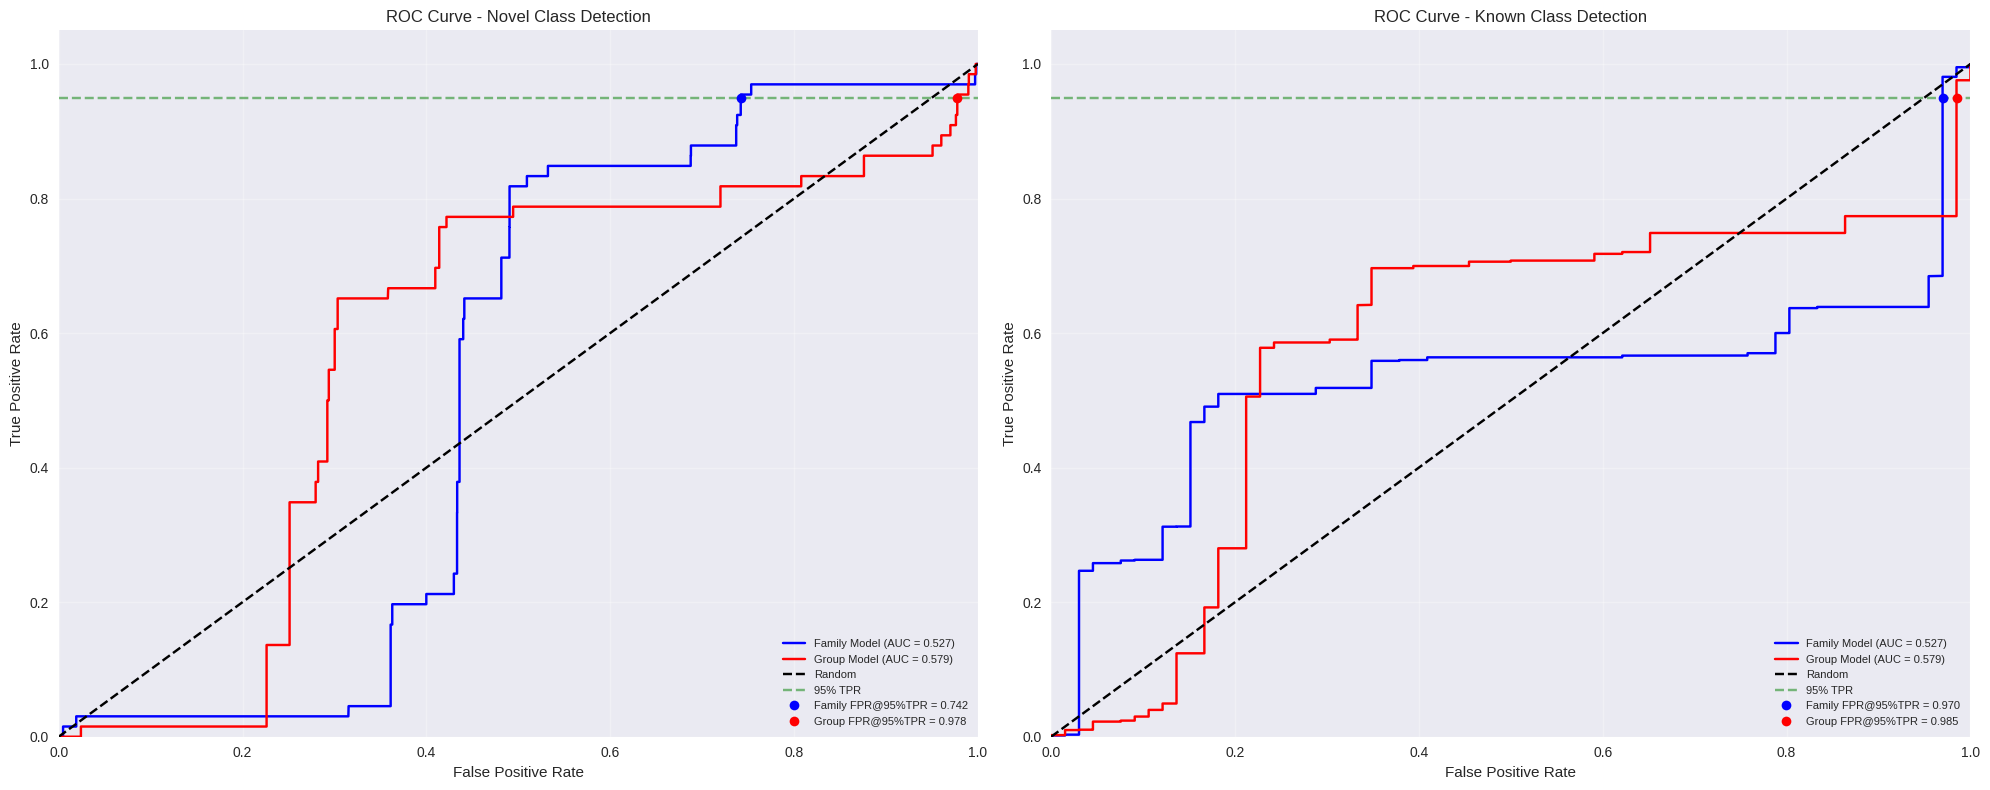

In [5]:
import json
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def load_metrics(filepath):
    """Load metrics from JSON file."""
    with open(filepath) as f:
        return json.load(f)

def calculate_roc_metrics(metrics_history):
    """Calculate ROC metrics using continuous outlier scores."""
    final_metrics = metrics_history[-1]
    
    # Get outlier scores
    outlier_scores = np.array(final_metrics['val']['outlier_scores'])
    
    # Get raw counts to construct true labels
    raw_counts = final_metrics['novel_detection']['overall']['raw_counts']
    
    # Construct true labels array for novel detection
    y_true = np.zeros(len(outlier_scores), dtype=int)
    
    # Mark novel samples as 1 (using TP and FN counts)
    n_novel = raw_counts['tp'] + raw_counts['fn']
    y_true[:n_novel] = 1
    
    # Calculate ROC curves
    # Novel class detection
    fpr_novel, tpr_novel, _ = roc_curve(y_true, outlier_scores)
    roc_auc_novel = auc(fpr_novel, tpr_novel)
    idx_novel = np.argmin(np.abs(tpr_novel - 0.95))
    fpr_at_95_tpr_novel = fpr_novel[idx_novel]
    
    # Known class detection (flip labels)
    fpr_known, tpr_known, _ = roc_curve(1 - y_true, -outlier_scores)  # Negate scores for known class
    roc_auc_known = auc(fpr_known, tpr_known)
    idx_known = np.argmin(np.abs(tpr_known - 0.95))
    fpr_at_95_tpr_known = fpr_known[idx_known]
    
    return {
        'novel': {
            'fpr': fpr_novel,
            'tpr': tpr_novel,
            'auc': roc_auc_novel,
            'fpr_at_95_tpr': fpr_at_95_tpr_novel
        },
        'known': {
            'fpr': fpr_known,
            'tpr': tpr_known,
            'auc': roc_auc_known,
            'fpr_at_95_tpr': fpr_at_95_tpr_known
        }
    }

def plot_roc_curves():
    """Plot ROC curves for both novel and known class detection."""
    # Load metrics
    family_metrics = load_metrics('/data/saranyav/gcn_new/family_metrics.json')
    group_metrics = load_metrics('/data/saranyav/gcn_new/group_metrics.json')
    
    # Calculate ROC metrics
    family_roc = calculate_roc_metrics(family_metrics)
    group_roc = calculate_roc_metrics(group_metrics)
    
    # Create subplot for both novel and known detection
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot Novel Class Detection (left subplot)
    ax1.plot(family_roc['novel']['fpr'], family_roc['novel']['tpr'], 'b-', 
             label=f'Family Model (AUC = {family_roc["novel"]["auc"]:.3f})')
    ax1.plot(group_roc['novel']['fpr'], group_roc['novel']['tpr'], 'r-',
             label=f'Group Model (AUC = {group_roc["novel"]["auc"]:.3f})')
    ax1.plot([0, 1], [0, 1], 'k--', label='Random')
    ax1.axhline(y=0.95, color='g', linestyle='--', alpha=0.5, label='95% TPR')
    ax1.plot([family_roc['novel']['fpr_at_95_tpr']], [0.95], 'bo', 
             label=f'Family FPR@95%TPR = {family_roc["novel"]["fpr_at_95_tpr"]:.3f}')
    ax1.plot([group_roc['novel']['fpr_at_95_tpr']], [0.95], 'ro', 
             label=f'Group FPR@95%TPR = {group_roc["novel"]["fpr_at_95_tpr"]:.3f}')
    
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curve - Novel Class Detection')
    ax1.legend(loc='lower right', fontsize=8)
    ax1.grid(True, alpha=0.3)
    
    # Plot Known Class Detection (right subplot)
    ax2.plot(family_roc['known']['fpr'], family_roc['known']['tpr'], 'b-', 
             label=f'Family Model (AUC = {family_roc["known"]["auc"]:.3f})')
    ax2.plot(group_roc['known']['fpr'], group_roc['known']['tpr'], 'r-',
             label=f'Group Model (AUC = {group_roc["known"]["auc"]:.3f})')
    ax2.plot([0, 1], [0, 1], 'k--', label='Random')
    ax2.axhline(y=0.95, color='g', linestyle='--', alpha=0.5, label='95% TPR')
    ax2.plot([family_roc['known']['fpr_at_95_tpr']], [0.95], 'bo', 
             label=f'Family FPR@95%TPR = {family_roc["known"]["fpr_at_95_tpr"]:.3f}')
    ax2.plot([group_roc['known']['fpr_at_95_tpr']], [0.95], 'ro', 
             label=f'Group FPR@95%TPR = {group_roc["known"]["fpr_at_95_tpr"]:.3f}')
    
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve - Known Class Detection')
    ax2.legend(loc='lower right', fontsize=8)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Generate plots
plot_roc_curves()

In [6]:
import json
import numpy as np
from typing import Dict
import logging

logger = logging.getLogger(__name__)

def load_metrics(filepath: str) -> Dict:
    """Load metrics from JSON file."""
    with open(filepath, 'r') as f:
        metrics = json.load(f)
    return metrics[-1]  # Get last epoch's metrics

def print_detailed_metrics(metrics: Dict, title: str):
    """Print detailed metrics including all available statistics."""
    print(f"\n{'-'*20} {title} {'-'*20}")
    
    # Print overall classification metrics
    if 'val' in metrics:
        val_metrics = metrics['val']
        
        if 'overall' in val_metrics:
            print("\n=== Overall Classification Performance ===")
            for metric, value in val_metrics['overall'].items():
                print(f"{metric.title()}: {value:.4f}")
        
        if 'per_class' in val_metrics:
            print("\n=== Per-Class Performance ===")
            for class_id, class_metrics in val_metrics['per_class'].items():
                print(f"\nClass {class_id}:")
                for metric, value in class_metrics.items():
                    if isinstance(value, (float, np.floating)):
                        print(f"{metric.title()}: {value:.4f}")
                    else:
                        print(f"{metric.title()}: {value}")
        
        # Print novel detection metrics if they exist
        if 'novel_detection' in val_metrics:
            novel_metrics = val_metrics['novel_detection']
            print("\n=== Novel Detection Performance ===")
            
            if 'overall' in novel_metrics:
                print("\nOverall Novel Detection:")
                for metric, value in novel_metrics['overall'].items():
                    if isinstance(value, (float, np.floating)):
                        print(f"{metric.title()}: {value:.4f}")
                    else:
                        print(f"{metric.title()}: {value}")
            
            if 'per_family' in novel_metrics:
                print("\nPer-Family Novel Detection:")
                for family, family_metrics in novel_metrics['per_family'].items():
                    print(f"\nFamily: {family}")
                    for metric, value in family_metrics.items():
                        if isinstance(value, (float, np.floating)):
                            print(f"{metric.title()}: {value:.4f}")
                        else:
                            print(f"{metric.title()}: {value}")

def main():
    try:
        # Load metrics
        print("\nLoading and analyzing metrics...")
        family_metrics = load_metrics('/data/saranyav/gcn_new/family_metrics.json')
        group_metrics = load_metrics('/data/saranyav/gcn_new/group_metrics.json')
        
        # Print detailed analysis
        print_detailed_metrics(family_metrics, "Family Classification")
        print_detailed_metrics(group_metrics, "Group Classification")
        
    except Exception as e:
        print(f"Error analyzing metrics: {str(e)}")
        raise e

if __name__ == "__main__":
    main()


Loading and analyzing metrics...

-------------------- Family Classification --------------------

=== Overall Classification Performance ===
Precision: 0.6225
Recall: 0.5591
F1: 0.5598

=== Per-Class Performance ===

Class 0:
Precision: 0.0240
Recall: 0.0149
F1: 0.0184
Support: 201
Avg_Confidence: 0.0674
Conf_Std: 0.0277

Class 1:
Precision: 1.0000
Recall: 0.0036
F1: 0.0073
Support: 274
Avg_Confidence: 0.0777
Conf_Std: 0.0354

Class 2:
Precision: 0
Recall: 0.0000
F1: 0
Support: 52
Avg_Confidence: 0.2365
Conf_Std: 0.0604

Class 3:
Precision: 0
Recall: 0.0000
F1: 0
Support: 4
Avg_Confidence: 0.0884
Conf_Std: 0.0152

Class 4:
Precision: 0
Recall: 0.0000
F1: 0
Support: 9
Avg_Confidence: 0.0710
Conf_Std: 0.0083

Class 6:
Precision: 0
Recall: 0.0000
F1: 0
Support: 5
Avg_Confidence: 0.0544
Conf_Std: 0.0103

Class 8:
Precision: 0
Recall: 0.0000
F1: 0
Support: 1
Avg_Confidence: 0.1910
Conf_Std: 0.0000

Class 9:
Precision: 0.8137
Recall: 0.9557
F1: 0.8790
Support: 384
Avg_Confidence: 0.5143
Co

/tmp/ipykernel_91815/3758471949.py:111: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


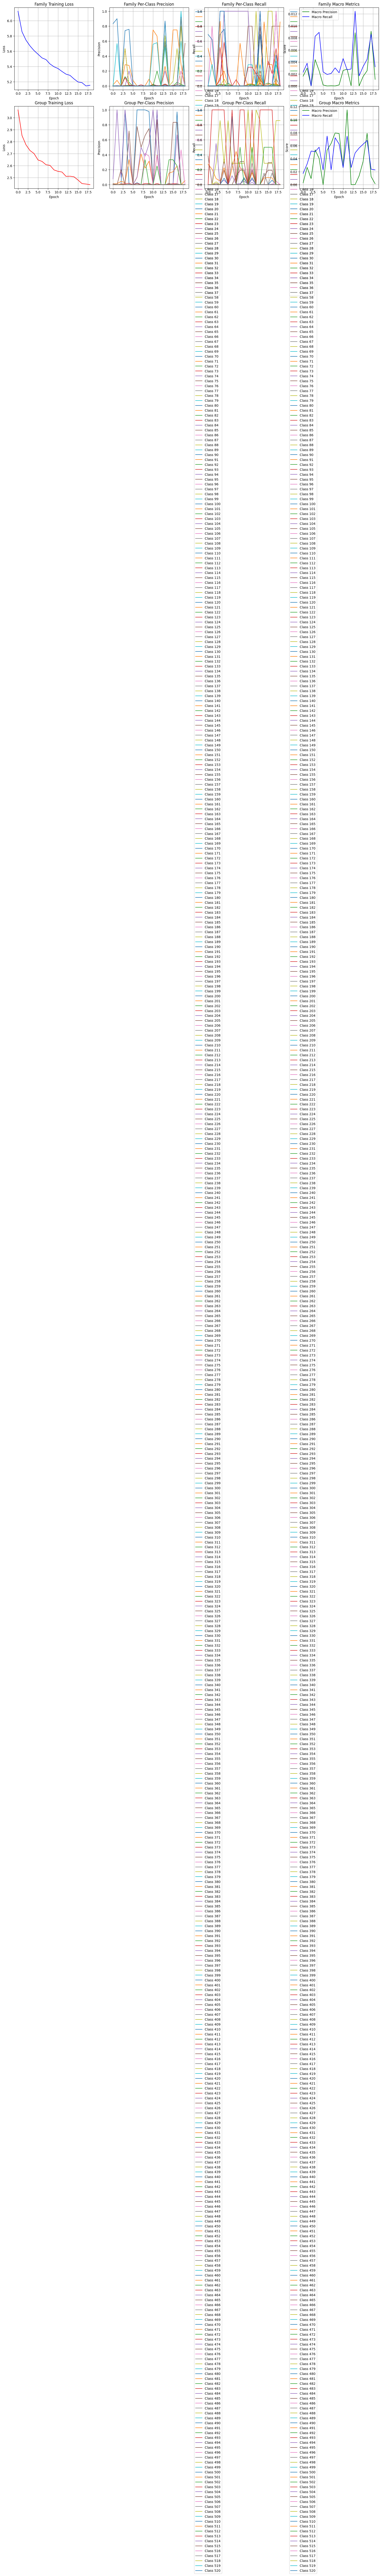


Family Classification Final Metrics:
Training Loss: 5.1533
Macro Precision: 0.0011
Macro Recall: 0.0032

Group Classification Final Metrics:
Training Loss: 2.4404
Macro Precision: 0.0014
Macro Recall: 0.0227

Per-Class Final Metrics:

Family Classification:

Class 0:
Precision: 0.0000
Recall: 0.0000
Support: 201

Class 1:
Precision: 0.0000
Recall: 0.0000
Support: 274

Class 2:
Precision: 0.0000
Recall: 0.0000
Support: 52

Class 3:
Precision: 0.0000
Recall: 0.0000
Support: 4

Class 4:
Precision: 0.0000
Recall: 0.0000
Support: 9

Class 5:
Precision: 0.0000
Recall: 0.0000
Support: 0

Class 6:
Precision: 0.0000
Recall: 0.0000
Support: 5

Class 7:
Precision: 0.0000
Recall: 0.0000
Support: 0

Class 8:
Precision: 0.0000
Recall: 0.0000
Support: 1

Class 9:
Precision: 0.0000
Recall: 0.0000
Support: 384

Class 10:
Precision: 0.0000
Recall: 0.0000
Support: 177

Class 11:
Precision: 0.0000
Recall: 0.0000
Support: 6

Class 12:
Precision: 0.0000
Recall: 0.0000
Support: 0

Class 13:
Precision: 0.000

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load metrics
with open('/data/saranyav/gcn_new/family_metrics.json', 'r') as f:
    family_metrics = json.load(f)
    
with open('/data/saranyav/gcn_new/group_metrics.json', 'r') as f:
    group_metrics = json.load(f)

# Extract epochs
epochs = range(len(family_metrics))

# Create a figure with subplots - 2 rows, 4 columns
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 10))

# Family Classification Plots (Top Row)
# Plot 1: Training Loss
train_loss = [m['train']['loss'] for m in family_metrics]
ax1.plot(epochs, train_loss, 'b-')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Family Training Loss')
ax1.grid(True)

# Plot 2: Per-Class Precision
for class_id in family_metrics[0]['val']['per_class'].keys():
    precision_values = [m['val']['per_class'][class_id]['precision'] for m in family_metrics]
    ax2.plot(epochs, precision_values, label=f'Class {class_id}')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Precision')
ax2.set_title('Family Per-Class Precision')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

# Plot 3: Per-Class Recall
for class_id in family_metrics[0]['val']['per_class'].keys():
    recall_values = [m['val']['per_class'][class_id]['recall'] for m in family_metrics]
    ax3.plot(epochs, recall_values, label=f'Class {class_id}')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Recall')
ax3.set_title('Family Per-Class Recall')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True)

# Plot 4: Macro Precision/Recall
family_macro_precision = []
family_macro_recall = []
for metrics in family_metrics:
    precisions = [m['precision'] for m in metrics['val']['per_class'].values()]
    recalls = [m['recall'] for m in metrics['val']['per_class'].values()]
    family_macro_precision.append(np.mean(precisions))
    family_macro_recall.append(np.mean(recalls))

ax4.plot(epochs, family_macro_precision, 'g-', label='Macro Precision')
ax4.plot(epochs, family_macro_recall, 'b-', label='Macro Recall')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Score')
ax4.set_title('Family Macro Metrics')
ax4.legend()
ax4.grid(True)

# Group Classification Plots (Bottom Row)
# Plot 5: Training Loss
group_loss = [m['train']['loss'] for m in group_metrics]
ax5.plot(epochs, group_loss, 'r-')
ax5.set_xlabel('Epoch')
ax5.set_ylabel('Loss')
ax5.set_title('Group Training Loss')
ax5.grid(True)

# Plot 6: Per-Class Precision
for class_id in group_metrics[0]['val']['per_class'].keys():
    precision_values = [m['val']['per_class'][class_id]['precision'] for m in group_metrics]
    ax6.plot(epochs, precision_values, label=f'Class {class_id}')
ax6.set_xlabel('Epoch')
ax6.set_ylabel('Precision')
ax6.set_title('Group Per-Class Precision')
ax6.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax6.grid(True)

# Plot 7: Per-Class Recall
for class_id in group_metrics[0]['val']['per_class'].keys():
    recall_values = [m['val']['per_class'][class_id]['recall'] for m in group_metrics]
    ax7.plot(epochs, recall_values, label=f'Class {class_id}')
ax7.set_xlabel('Epoch')
ax7.set_ylabel('Recall')
ax7.set_title('Group Per-Class Recall')
ax7.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax7.grid(True)

# Plot 8: Macro Precision/Recall
group_macro_precision = []
group_macro_recall = []
for metrics in group_metrics:
    precisions = [m['precision'] for m in metrics['val']['per_class'].values()]
    recalls = [m['recall'] for m in metrics['val']['per_class'].values()]
    group_macro_precision.append(np.mean(precisions))
    group_macro_recall.append(np.mean(recalls))

ax8.plot(epochs, group_macro_precision, 'g-', label='Macro Precision')
ax8.plot(epochs, group_macro_recall, 'b-', label='Macro Recall')
ax8.set_xlabel('Epoch')
ax8.set_ylabel('Score')
ax8.set_title('Group Macro Metrics')
ax8.legend()
ax8.grid(True)

plt.tight_layout()
plt.show()

# Print final metrics for both classifiers
print("\nFamily Classification Final Metrics:")
final_family = family_metrics[-1]
print(f"Training Loss: {final_family['train']['loss']:.4f}")
print(f"Macro Precision: {family_macro_precision[-1]:.4f}")
print(f"Macro Recall: {family_macro_recall[-1]:.4f}")

print("\nGroup Classification Final Metrics:")
final_group = group_metrics[-1]
print(f"Training Loss: {final_group['train']['loss']:.4f}")
print(f"Macro Precision: {group_macro_precision[-1]:.4f}")
print(f"Macro Recall: {group_macro_recall[-1]:.4f}")

# Print per-class metrics for last epoch
print("\nPer-Class Final Metrics:")
print("\nFamily Classification:")
for class_id, metrics in final_family['val']['per_class'].items():
    print(f"\nClass {class_id}:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"Support: {metrics['support']}")

print("\nGroup Classification:")
for class_id, metrics in final_group['val']['per_class'].items():
    print(f"\nClass {class_id}:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"Support: {metrics['support']}")

/tmp/ipykernel_91815/1740750794.py:68: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


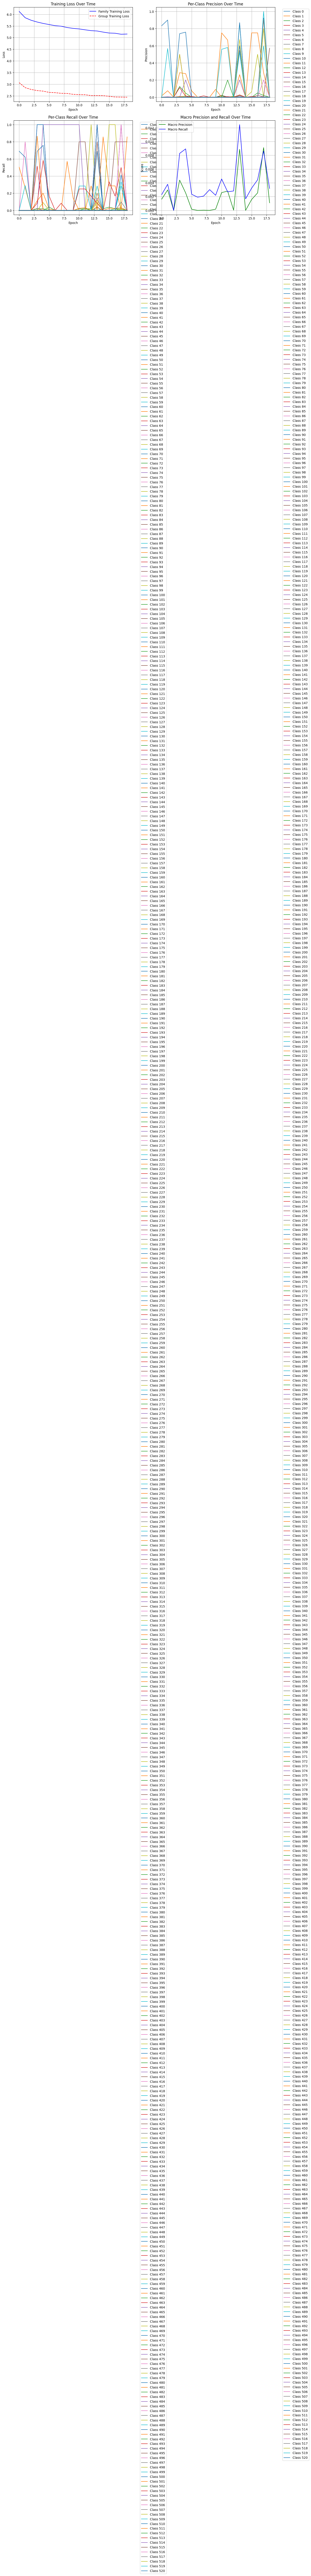


Final Epoch Metrics:
Training Loss: 5.1533

Per-Class Final Metrics:

Class 0:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 201

Class 1:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 274

Class 2:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 52

Class 3:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 4

Class 4:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 9

Class 5:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 0

Class 6:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 5

Class 7:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 0

Class 8:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 1

Class 9:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 384

Class 10:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 177

Class 11:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 6

Class 12:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 0

Class 13:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 46

Class

In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load metrics
with open('/data/saranyav/gcn_new/family_metrics.json', 'r') as f:
    family_metrics = json.load(f)
    
with open('/data/saranyav/gcn_new/group_metrics.json', 'r') as f:
    group_metrics = json.load(f)

# Extract epochs
epochs = range(len(family_metrics))

# Create a figure with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Training Loss vs Epoch
train_loss = [m['train']['loss'] for m in family_metrics]
ax1.plot(epochs, train_loss, 'b-', label='Family Training Loss')
if group_metrics:
    group_loss = [m['train']['loss'] for m in group_metrics]
    ax1.plot(epochs, group_loss, 'r--', label='Group Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot 2: Precision vs Epoch for each class
for class_id in family_metrics[0]['val']['per_class'].keys():
    precision_values = [m['val']['per_class'][class_id]['precision'] for m in family_metrics]
    ax2.plot(epochs, precision_values, label=f'Class {class_id}')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Precision')
ax2.set_title('Per-Class Precision Over Time')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

# Plot 3: Recall vs Epoch for each class
for class_id in family_metrics[0]['val']['per_class'].keys():
    recall_values = [m['val']['per_class'][class_id]['recall'] for m in family_metrics]
    ax3.plot(epochs, recall_values, label=f'Class {class_id}')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Recall')
ax3.set_title('Per-Class Recall Over Time')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True)

# Plot 4: Macro Precision/Recall vs Epoch
macro_precision = []
macro_recall = []
for metrics in family_metrics:
    precisions = [m['precision'] for m in metrics['val']['per_class'].values()]
    recalls = [m['recall'] for m in metrics['val']['per_class'].values()]
    macro_precision.append(np.mean(precisions))
    macro_recall.append(np.mean(recalls))

ax4.plot(epochs, macro_precision, 'g-', label='Macro Precision')
ax4.plot(epochs, macro_recall, 'b-', label='Macro Recall')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Score')
ax4.set_title('Macro Precision and Recall Over Time')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

# Print final epoch metrics
final_epoch = family_metrics[-1]
print("\nFinal Epoch Metrics:")
print(f"Training Loss: {final_epoch['train']['loss']:.4f}")
print("\nPer-Class Final Metrics:")
for class_id, metrics in final_epoch['val']['per_class'].items():
    print(f"\nClass {class_id}:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1: {metrics['f1']:.4f}")
    print(f"Support: {metrics['support']}")

print("\nFinal Macro Metrics:")
print(f"Macro Precision: {macro_precision[-1]:.4f}")
print(f"Macro Recall: {macro_recall[-1]:.4f}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
import numpy as np
from pathlib import Path

def load_results(baseline_path: str, method_path: str):
    with open(baseline_path) as f:
        baseline_results = json.load(f)
    with open(method_path) as f:
        method_results = json.load(f)
    return baseline_results, method_results

def set_style():
    plt.style.use('seaborn')
    colors = sns.color_palette("husl", 4)
    sns.set_palette(colors)
    return colors

def plot_performance_comparison(baseline_results, method_results, colors):
    methods_data = []
    
    # Baseline metrics
    methods_data.extend([
        {
            'Method': 'Traditional GNN',
            'Type': 'Baseline',
            'Precision': baseline_results['baseline_gnn']['overall']['precision'],
            'Recall': baseline_results['baseline_gnn']['overall']['recall'],
            'F1': baseline_results['baseline_gnn']['overall']['f1']
        },
        {
            'Method': 'Random Forest',
            'Type': 'Baseline',
            'Precision': baseline_results['random_forest']['overall']['precision'],
            'Recall': baseline_results['random_forest']['overall']['recall'],
            'F1': baseline_results['random_forest']['overall']['f1']
        }
    ])
    
    # Our method metrics
    test_results = method_results['test_results']
    methods_data.extend([
        {
            'Method': 'Family-Level',
            'Type': 'Temporal-Symbolic Model',
            'Precision': test_results['family']['metrics']['overall']['precision'],
            'Recall': test_results['family']['metrics']['overall']['recall'],
            'F1': test_results['family']['metrics']['overall']['f1']
        },
        {
            'Method': 'Group-Level',
            'Type': 'Temporal-Symbolic Model',
            'Precision': test_results['group']['metrics']['overall']['precision'],
            'Recall': test_results['group']['metrics']['overall']['recall'],
            'F1': test_results['group']['metrics']['overall']['f1']
        }
    ])
    
    df = pd.DataFrame(methods_data)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.25
    opacity = 0.8
    
    index = np.arange(len(df['Method'].unique()))
    
    metrics = ['Precision', 'Recall', 'F1']
    for i, metric in enumerate(metrics):
        plt.bar(index + i*bar_width, 
                df[metric], 
                bar_width,
                alpha=opacity,
                color=colors[i],
                label=metric)
    
    plt.xlabel('Methods')
    plt.ylabel('Score')
    plt.title('Performance Comparison: Baselines vs Temporal-Symbolic Model')
    plt.xticks(index + bar_width, df['Method'], rotation=45)
    
    # Add type labels
    for i, method in enumerate(df['Method']):
        type_label = df[df['Method'] == method]['Type'].iloc[0]
        plt.text(i, -0.05, type_label, 
                rotation=45, ha='right', va='top', 
                transform=ax.get_xaxis_transform())
    
    plt.legend()
    plt.tight_layout()
    plt.savefig('performance_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()

def plot_novel_detection(baseline_results, method_results, colors):
    methods_data = []
    
    # Baseline novel detection
    for method in ['isolation_forest', 'one_class_svm']:
        methods_data.append({
            'Method': method.replace('_', ' ').title(),
            'Type': 'Baseline',
            'Precision': baseline_results[method]['precision'],
            'Recall': baseline_results[method]['recall'],
            'F1': baseline_results[method]['f1']
        })
    
    # Our method novel detection
    test_results = method_results['test_results']
    for model in ['family', 'group']:
        methods_data.append({
            'Method': f'{model.title()}-Level',
            'Type': 'Temporal-Symbolic Model',
            'Precision': test_results[model]['novel_detection']['overall']['precision'],
            'Recall': test_results[model]['novel_detection']['overall']['recall'],
            'F1': test_results[model]['novel_detection']['overall']['f1']
        })
    
    df = pd.DataFrame(methods_data)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=pd.melt(df, 
                            id_vars=['Method', 'Type'], 
                            var_name='Metric', 
                            value_name='Score'),
                x='Method', y='Score', hue='Metric', palette=colors[:3])
    
    plt.xticks(rotation=45)
    plt.title('Novel Detection Performance')
    
    # Add type labels
    ax = plt.gca()
    for i, method in enumerate(df['Method']):
        type_label = df[df['Method'] == method]['Type'].iloc[0]
        plt.text(i, -0.05, type_label, 
                rotation=45, ha='right', va='top', 
                transform=ax.get_xaxis_transform())
    
    plt.tight_layout()
    plt.savefig('novel_detection_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()

def plot_training_history(method_results):
    history = method_results['training_history']
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    for model_type in ['family', 'group']:
        metrics = pd.DataFrame([{
            'epoch': data['epoch'],
            'train_acc': data['train']['accuracy'],
            'train_loss': data['train']['loss'],
            'val_acc': np.mean([m['recall'] for m in data['val']['per_class'].values() 
                              if isinstance(m, dict) and m['support'] > 0])
        } for data in history[model_type]])
        
        ax = ax1 if model_type == 'family' else ax2
        title = f"{model_type.title()}-Level Training"
        
        # Plot accuracy and loss
        ax.plot(metrics['epoch'], metrics['train_acc'], label='Train Accuracy')
        ax.plot(metrics['epoch'], metrics['val_acc'], label='Validation Accuracy')
        ax2 = ax.twinx()  # Create second y-axis
        ax2.plot(metrics['epoch'], metrics['train_loss'], 'r--', label='Train Loss')
        
        ax.set_title(title)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        ax2.set_ylabel('Loss')
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2)

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300)
    plt.close()

def plot_group_distribution(method_results):
    data_stats = method_results['data_statistics']['test']['group']
    
    # Convert counts to DataFrame
    df = pd.DataFrame([
        {'group': group, 'count': count}
        for group, count in data_stats['known_groups'].items()
    ])
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='group', y='count')
    plt.title('Behavioral Group Distribution')
    plt.xlabel('Group ID')
    plt.ylabel('Sample Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('group_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    colors = set_style()

    baseline_results, method_results = load_results('/data/saranyav/gcn_new/baseline_results.json', '/data/saranyav/gcn_new/final_report.json')
    # Generate all plots
    plot_performance_comparison(baseline_results, method_results, colors)
    plot_novel_detection(baseline_results, method_results, colors)
    plot_training_history(method_results)
    plot_group_distribution(method_results)